In [1]:
from pinpoint import Tracker, VideoReader
import pinpoint.utils as utils
import matplotlib.pyplot as plt
import time
import h5py
import glob
import cv2
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
videos = sorted(glob.glob("/Volumes/Samsung_T3/Work/Videos/day1_fish10/*.mp4"))
videos

['/Volumes/Samsung_T3/Work/Videos/day1_fish10/000000.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000001.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000002.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000003.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000004.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000005.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000006.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000007.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000008.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000009.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000010.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000011.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000012.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000013.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000014.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000015.mp4',
 '/Volumes/Samsung_T3/Work/Videos/day1_fish10/000016.mp4

In [ ]:
for i in range(30,50):
    tracker = Tracker(source=videos[i],
                  block_size=21,
                  offset=-5,
                  distance_threshold=20,
                  area_range=(100,600),
                  tolerance=0.1,
                  channel='green',
                  var_thresh=200,
                  resize=2)
    
    tracker.load_dict('/Users/viveksridhar/Documents/Code/Python/pinpoint/barcodes/3x3_2bit/master_list.pkl')
    
    name = 'day1_fish10_' + videos[i][44:50]

    t0 = time.time()
    fetch_dict = tracker.track(name + '.h5',batch_size=200, n_jobs=-1)
    print('video ' + str(i) + 'tracked!')

video 30tracked!
video 31tracked!
video 32tracked!
video 33tracked!


In [34]:
f = h5py.File(name + '.h5', 'r')

In [35]:
frame_idx = f['data/frame_idx'].value
corners = f['data/corners'].value
identity = f['data/identity'].value
distances = f['data/distances'].value

In [36]:
fps = f.attrs['fps']
codec = f.attrs['codec']
height = f.attrs['height']
width = f.attrs['width']
total_frames = f.attrs['total_frames']

In [37]:
f.close()

In [38]:
np.unique(identity[distances < 1])

array([ 2,  4,  5,  8, 15, 16, 17, 22, 25, 27, 28], dtype=int32)

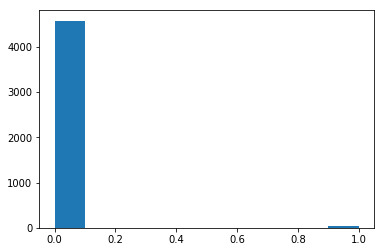

In [39]:
plt.hist(distances, bins=10)
plt.show()